# 1 - SVM的基本概念

　　支持向量机（Support Vector Machine, SVM）的基本模型是在特征空间上找到最佳的分离超平面使得训练集上正负样本间隔最大。SVM是用来解决二分类问题的有监督学习算法，在引入了核方法之后SVM也可以用来解决非线性问题。我们分别从线性和非线性两个方面来学习支持向量机

* 线性可分支持向量机：当训练数据线性可分时，可通过间隔最大化学得一个线性可分支持向量机。


* 非线性支持向量机：当训练数据线性不可分时，可通过核方法以及间隔最大化学得一个非线性支持向量机。

# 2 - 线性SVM

先看下线性可分的二分类问题。

![ml_8_9.jpg](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/11-%E7%BA%BF%E6%80%A71.jpg?raw=true)

　　上图中的(a)是已有的数据，红色和蓝色分别代表两个不同的类别。数据显然是线性可分的，但是将两类数据点分开的直线显然不止一条。上图的(b)和(c)分别给出了B、C两种不同的分类方案，其中黑色实线为分界线，术语称为“决策面”。每个决策面对应了一个线性分类器。虽然从分类结果上看，分类器A和分类器B的效果是相同的。但是他们的性能是有差距的，看下图：

![ml_8_10.jpg](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/11-%E7%BA%BF%E6%80%A72.jpg?raw=true)

　　在"决策面"不变的情况下，我又添加了一个红点。可以看到，分类器B依然能很好的分类结果，而分类器C则出现了分类错误。显然分类器B的"决策面"放置的位置优于分类器C的"决策面"放置的位置，SVM算法也是这么认为的，它的依据就是分类器B的分类间隔比分类器C的分类间隔大。
  
　　这里涉及到第一个SVM独有的概念"分类间隔"。在保证决策面方向不变且不会出现错分样本的情况下移动决策面，会在原来的决策面两侧找到两个极限位置（越过该位置就会产生错分现象），如虚线所示。虚线的位置由决策面的方向和距离原决策面最近的几个样本的位置决定。
   
　　而这两条平行虚线正中间的分界线就是在保持当前决策面方向不变的前提下的最优决策面。两条虚线之间的垂直距离就是这个最优决策面对应的分类间隔。显然每一个可能把数据集正确分开的方向都有一个最优决策面（有些方向无论如何移动决策面的位置也不可能将两类样本完全分开），而不同方向的最优决策面的分类间隔通常是不同的，那个具有“最大间隔”的决策面就是SVM要寻找的最优解。而这个真正的最优解对应的两侧虚线所穿过的样本点，就是SVM中的支持样本点，称为"支持向量"。
  
  
# 3 - 数学建模

　　 求解这个"决策面"的过程，就是最优化。一个最优化问题通常有两个基本的因素：1）目标函数，也就是你希望什么东西的什么指标达到最好；2）优化对象，你期望通过改变哪些因素来使你的目标函数达到最优。在线性SVM算法中，目标函数显然就是那个"分类间隔"，而优化对象则是决策面。所以要对SVM问题进行数学建模，首先要对上述两个对象（"分类间隔"和"决策面"）进行数学描述。按照一般的思维习惯，我们先描述决策面。
   
数学建模的时候，先在二维空间建模，然后再推广到多维。
  
（1）“决策面”方程
  
我们都知道二维空间下一条直线的方式如下所示：

$y=ax+b$
  
  
现在我们做个小小的改变，让原来的x轴变成x1，y轴变成x2：

$x_2 = ax_1+b$

移项得：

$ax_1-x_2+b=0$

将公式向量化得：
 $$ \begin{bmatrix}
 a&-1 
\end{bmatrix}\begin{bmatrix}
 x1\\
 x2
\end{bmatrix}+b=0$$
进一步向量化，用w列向量和x列向量和标量γ进一步向量化：
  $$w^Tx+\gamma=0$$
其中，向量$w$和$x$分别为：
  $$w=[w_1,w_2]^T,x=[x_1,x_2]^T$$

这里$w1=a$，$w2=-1$。我们都知道，最初的那个直线方程$a$和$b$的几何意义，$a$表示直线的斜率，$b$表示截距，$a$决定了直线与$x$轴正方向的夹角，$b$决定了直线与$y$轴交点位置。那么向量化后的直线的$w$和$\gamma$的几何意义是什么呢？  

现在假设：
$$a=\sqrt{3},b=0$$

可得：
$$w=[\sqrt{3},-1]^T$$

在坐标轴上画出直线和向量W：
![ml_8_19.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/11-%E5%BB%BA%E6%A8%A11.png?raw=true)

蓝色的线代表向量w，红色的线代表直线y。我们可以看到向量w和直线的关系为垂直关系。这说明了向量w也控制这直线的方向，只不过是与这个直线的方向是垂直的。标量γ的作用也没有变，依然决定了直线的截距。此时，我们称w为直线的法向量。

二维空间的直线方程已经推导完成，将其推广到n维空间，就变成了超平面方程。(一个超平面，在二维空间的例子就是一个直线)但是它的公式没变，依然是：
$$w^Tx+\gamma=0$$

不同之处在于：
$$w=[w_1,w_2,\dots,w_n]^T$$

$$x=[x_1,x_2,\dots,x_n]^T$$
我们已经顺利推导出了"决策面"方程，它就是我们的超平面方程，之后，我们统称其为超平面方程。

（2）"分类间隔"方程

现在，我们依然对于一个二维平面的简单例子进行推导。

![ml_8_22.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/11-%E5%BB%BA%E6%A8%A12.png?raw=true)

我们已经知道间隔的大小实际上就是支持向量对应的样本点到决策面的距离的二倍。那么图中的距离d我们怎么求？我们高中都学过，点到直线的距离距离公式如下：

$$d = \left |\frac{Ax_0+By_0+C}{\sqrt{A^2+B^2}}\right|$$

公式中的直线方程为$Ax_0+By_0+C=0$，点P的坐标为$(x_0,y_0)$

现在，将直线方程扩展到多维，求得我们现在的超平面方程，对公式进行如下变形：

$$d=\left|\frac{w^Tx+\gamma}{\left \| w \right \|}\right|$$

这个d就是"分类间隔"。其中||w||表示w的二范数，求所有元素的平方和，然后再开方。比如对于二维平面：

$$w=[w_1,w_2]^T$$

那么：
$$||w||=\sqrt{w_1^2+w_2^2}$$

我们目的是为了找出一个分类效果好的超平面作为分类器。分类器的好坏的评定依据是分类间隔W=2d的大小，即分类间隔w越大，我们认为这个超平面的分类效果越好。此时，求解超平面的问题就变成了求解分类间隔W最大化的为题。W的最大化也就是d最大化的。

（3）约束条件

看起来，我们已经顺利获得了目标函数的数学形式。但是为了求解w的最大值。我们不得不面对如下问题：

* 我们如何判断超平面是否将样本点正确分类？


* 我们知道要求距离d的最大值，我们首先需要找到支持向量上的点，怎么在众多的点中选出支持向量上的点呢？


上述我们需要面对的问题就是约束条件，也就是说我们优化的变量d的取值范围受到了限制和约束。事实上约束条件一直是最优化问题里最让人头疼的东西。但既然我们已经知道了这些约束条件确实存在，就不得不用数学语言对他们进行描述。但SVM算法通过一些巧妙的小技巧，将这些约束条件融合到一个不等式里面。

这个二维平面上有两种点，我们分别对它们进行标记：

* 红颜色的圆点标记为1，我们人为规定其为正样本；


* 蓝颜色的五角星标记为-1，我们人为规定其为负样本。


对每个样本点xi加上一个类别标签$y_i$：

$$y_i=\begin{cases}
+1 & \text{ red }  \\ 
 -1& \text{ blue } 
\end{cases}$$

如果我们的超平面方程能够完全正确地对上图的样本点进行分类，就会满足下面的方程：

$$\begin{cases}
w^Tx_i+\gamma>0 & y_i=1  \\ 
w^Tx_i+\gamma<0& y_i=-1 
\end{cases}$$


如果我们要求再高一点，假设决策面正好处于间隔区域的中轴线上，并且相应的支持向量对应的样本点到决策面的距离为d，那么公式进一步写成：

$$\begin{cases}
\frac{w^Tx_i+\gamma}{||w||}\geq d & \forall y_i=1\\ 
 \frac{w^Tx_i+\gamma}{||w||}\geq -d & \forall y_i=-1 
\end{cases}$$


上述公式的解释就是，对于所有分类标签为1和-1样本点，它们到直线的距离都大于等于d(支持向量上的样本点到超平面的距离)。公式两边都除以d，就可以得到：

$$\begin{cases}
w_d^Tx_i+\gamma_d>1 & y_i=1  \\ 
w_d^Tx_i+\gamma_d<-1& y_i=-1 
\end{cases}$$

其中，

$$w_d=\frac{w}{||w||d}$$

$$\gamma_d=\frac{\gamma}{||w||d}$$


因为||w||和d都是标量。所以上述公式的两个矢量，依然描述一条直线的法向量和截距。

$$w_d^T+\gamma_d=0$$

$$w^Tx+\gamma=0$$

上述两个公式，都是描述一条直线，数学模型代表的意义是一样的。现在，让我们对wd和γd重新起个名字，就叫它们w和γ。因此，我们就可以说："对于存在分类间隔的两类样本点，我们一定可以找到一些超平面，使其对于所有的样本点均满足下面的条件："

$$\begin{cases}
w^Tx_i+\gamma>1 & y_i=1  \\ 
w^Tx_i+\gamma<-1& y_i=-1 
\end{cases}$$

上述方程即给出了SVM最优化问题的约束条件。这时候，可能有人会问了，为什么标记为1和-1呢？因为这样标记方便我们将上述方程变成如下形式：

$$y_i(w^Tx_i+\gamma)\geq 1$$

正是因为标签为1和-1，才方便我们将约束条件变成一个约束方程，从而方便我们的计算。

（4）线性SVM优化问题基本描述

现在整合一下思路，我们已经得到我们的目标函数：

$$d=\frac{|w^Tx+\gamma|}{||w||}$$

我们的优化目标是是d最大化。我们已经说过，我们是用支持向量上的样本点求解d的最大化的问题的。那么支持向量上的样本点有什么特点呢？

$$|w^Tx_i+\gamma|=1$$

现在我们就可以将我们的目标函数进一步化简：

$$d=\frac{1}{||w||}$$

因为，我们只关心支持向量上的点。随后我们求解d的最大化问题变成了||w||的最小化问题。进而||w||的最小化问题等效于

$$min\frac{1}{2}||w||^2$$

为什么要做这样的等效呢？这是为了在进行最优化的过程中对目标函数求导时比较方便，但这绝对不影响最优化问题最后的求解。我们将最终的目标函数和约束条件放在一起进行描述：

$$min\frac{1}{2}||w||^2$$

$$s.t.　y_i(w^Tx_i+b)\geq 1,i=1,2,\dots,n$$

这里n是样本点的总个数，缩写s.t.表示"Subject to"，是"服从某某条件"的意思。上述公式描述的是一个典型的不等式约束条件下的二次型函数优化问题，同时也是支持向量机的基本数学模型。

（5）求解准备

我们已经得到支持向量机的基本数学模型，接下来的问题就是如何根据数学模型，求得我们想要的最优解。在学习求解方法之前，我们得知道一点，想用我下面讲述的求解方法有一个前提，就是我们的目标函数必须是凸函数。理解凸函数，我们还要先明确另一个概念，凸集。在凸几何中，凸集(convex set)是在)凸组合下闭合的放射空间的子集。看一幅图可能更容易理解：

![ml_8_41.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/11-%E6%B1%82%E8%A7%A31.png?raw=true)

左右量图都是一个集合。如果集合中任意2个元素连线上的点也在集合中，那么这个集合就是凸集。显然，上图中的左图是一个凸集，上图中的右图是一个非凸集。

凸函数的定义也是如此，其几何意义表示为函数任意两点连线上的值大于对应自变量处的函数值。若这里凸集C即某个区间L，那么，设函数f为定义在区间L上的函数，若对L上的任意两点x1，x2和任意的实数λ，λ属于(0,1)，总有：

$$f(\lambda x_1+(1-\lambda)x_2)\leq \lambda f(x_1)+(1-\lambda)f(x_2)$$

则函数f称为L上的凸函数，当且仅当其上镜图（在函数图像上方的点集）为一个凸集。再看一幅图，也许更容易理解：


![ml_8_43_modify.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/11-%E6%B1%82%E8%A7%A32.png?raw=true)

像上图这样的函数，它整体就是一个非凸函数，我们无法获得全局最优解的，只能获得局部最优解。比如红框内的部分，如果单独拿出来，它就是一个凸函数。对于我们的目标函数：

$$min\frac{1}{2}||w||^2$$

通常我们需要求解的最优化问题有如下几类：

* 无约束优化问题，可以写为：

$$min　f(x)$$

* 有等式约束的优化问题，可以写为：

$$min　f(x)$$

$$s.t.　h_i(x)=0,i=1,2,\dots,n$$

* 有不等式约束的优化问题，可以写为：

$$min　f(x)$$

$$s.t.　g_i(x)\leq 0,i=1,2,\dots,n$$

$$h_j(x)=0,j=1,2,\dots,m$$

对于第(a)类的优化问题，尝试使用的方法就是费马大定理(Fermat)，即使用求取函数f(x)的导数，然后令其为零，可以求得候选最优值，再在这些候选值中验证；如果是凸函数，可以保证是最优解。这也就是我们高中经常使用的求函数的极值的方法。

对于第(b)类的优化问题，常常使用的方法就是拉格朗日乘子法（Lagrange Multiplier) ，即把等式约束h_i(x)用一个系数与f(x)写为一个式子，称为拉格朗日函数，而系数称为拉格朗日乘子。通过拉格朗日函数对各个变量求导，令其为零，可以求得候选值集合，然后验证求得最优值。

对于第(c)类的优化问题，常常使用的方法就是KKT条件。同样地，我们把所有的等式、不等式约束与f(x)写为一个式子，也叫拉格朗日函数，系数也称拉格朗日乘子，通过一些条件，可以求出最优值的必要条件，这个条件称为KKT条件。

必要条件和充要条件如果不理解，可以看下面这句话：

* A的必要条件就是A可以推出的结论

* A的充分条件就是可以推出A的前提

了解到这些，现在让我们再看一下我们的最优化问题：

$$min\frac{1}{2}||w||^2$$

$$s.t.　y_i(w^Tx_i+b)\geq 1,i=1,2,\dots,n$$

现在，我们的这个对优化问题属于哪一类？很显然，它属于第(c)类问题。在学习求解最优化问题之前，我们还要学习两个东西：拉格朗日函数和KKT条件。

（6）拉格朗日函数

首先，我们先要从宏观的视野上了解一下拉格朗日对偶问题出现的原因和背景。

我们知道我们要求解的是最小化问题，所以一个直观的想法是如果我能够构造一个函数，使得该函数在可行解区域内与原目标函数完全一致，而在可行解区域外的数值非常大，甚至是无穷大，那么这个没有约束条件的新目标函数的优化问题就与原来有约束条件的原始目标函数的优化问题是等价的问题。这就是使用拉格朗日方程的目的，它将约束条件放到目标函数中，从而将有约束优化问题转换为无约束优化问题。

随后，人们又发现，使用拉格朗日获得的函数，使用求导的方法求解依然困难。进而，需要对问题再进行一次转换，即使用一个数学技巧：拉格朗日对偶。

所以，显而易见的是，我们在拉格朗日优化我们的问题这个道路上，需要进行下面二个步骤：

* 将有约束的原始目标函数转换为无约束的新构造的拉格朗日目标函数

* 使用拉格朗日对偶性，将不易求解的优化问题转化为易求解的优化

下面，进行第一步：将有约束的原始目标函数转换为无约束的新构造的拉格朗日目标函数

公式变形如下：

$$L(w,b,\alpha)=\frac{1}{2}||w||^2-\sum_{i=1}^n\alpha_i(y_i(w^Tx_i+b)-1)$$

其中αi是拉格朗日乘子，αi大于等于0，是我们构造新目标函数时引入的系数变量(我们自己设置)。现在我们令：

$$\theta(w)=\underset{\alpha_i\geq 0}{max}L(w,b,\alpha)$$

当样本点不满足约束条件时，即在可行解区域外：

$$y_i(w^Tx_i+b)<1$$

此时，我们将αi设置为正无穷，此时θ(w)显然也是正无穷。

当样本点满足约束条件时，即在可行解区域内：

$$y_i(w^Tx_i+b)\geq 1$$

此时，显然θ(w)为原目标函数本身。我们将上述两种情况结合一下，就得到了新的目标函数：

$$\theta(w)=\begin{cases}
\frac{1}{2}||w||^2 & x\in feasible  \\ 
\infty & x\in not feasible
\end{cases}$$

此时，再看我们的初衷，就是为了建立一个在可行解区域内与原目标函数相同，在可行解区域外函数值趋近于无穷大的新函数，现在我们做到了。

现在，我们的问题变成了求新目标函数的最小值，即：

$$\underset{w,b}{min}\theta(w)=\underset{w,b}{min}\underset{\alpha_i \geq 0}{max}L(w,b,\alpha)=p^*$$

这里用p*表示这个问题的最优值，且和最初的问题是等价的。

接下来，我们进行第二步：将不易求解的优化问题转化为易求解的优化

我们看一下我们的新目标函数，先求最大值，再求最小值。这样的话，我们首先就要面对带有需要求解的参数w和b的方程，而αi又是不等式约束，这个求解过程不好做。所以，我们需要使用拉格朗日函数对偶性，将最小和最大的位置交换一下，这样就变成了：

$$\underset{\alpha_i\geq 0}{max}\underset{w,b}{min}L(w,b,\alpha)=d^*$$

交换以后的新问题是原始问题的对偶问题，这个新问题的最优值用d*来表示。而且d*<=p*。我们关心的是d=p的时候，这才是我们要的解。需要什么条件才能让d=p呢？

* 首先必须满足这个优化问题是凸优化问题。


* 其次，需要满足KKT条件。


凸优化问题的定义是：求取最小值的目标函数为凸函数的一类优化问题。目标函数是凸函数我们已经知道，这个优化问题又是求最小值。所以我们的最优化问题就是凸优化问题。

接下里，就是探讨是否满足KKT条件了。

（7）KKT条件

我们已经使用拉格朗日函数对我们的目标函数进行了处理，生成了一个新的目标函数。通过一些条件，可以求出最优值的必要条件，这个条件就是接下来要说的KKT条件。一个最优化模型能够表示成下列标准形式：

$$minf(x)$$

$$s.t.　h_j(x)=0,j=1,2,\dots,p$$

$$g_k(x)\leq 0,k=1,2,\dots,q$$

$$x\in X\subset \mathbb{R}$$

KKT条件的全称是Karush-Kuhn-Tucker条件，KKT条件是说最优值条件必须满足以下条件：

* 条件一：经过拉格朗日函数处理之后的新目标函数L(w,b,α)对x求导为零：

* 条件二：h(x) = 0；

* 条件三：α*g(x) = 0；

现在，凸优化问题和KKT都满足了，问题转换成了对偶问题。而求解这个对偶学习问题，可以分为三个步骤：首先要让L(w,b,α)关于w和b最小化，然后求对α的极大，最后利用SMO算法求解对偶问题中的拉格朗日乘子。现在，我们继续推导。

（8）对偶问题求解

第一步：

根据上述推导已知：

$$\underset{\alpha_i\geq 0}{max}\underset{w,b}{min}L(w,b,\alpha)=d^*$$

$$L(w,b,\alpha)=\frac{1}{2}||w||^2-\sum_{i=1}^n\alpha_i(y_i(w^Tx_i+b)-1)$$

首先固定α，要让L(w,b,α)关于w和b最小化，我们分别对w和b偏导数，令其等于0，即：

$$\frac{\partial L}{\partial w}=0\Rightarrow w=\sum_{i=1}^n\alpha_iy_ix_i$$

$$\frac{\partial L}{\partial w}=0\Rightarrow \sum_{i=1}^n\alpha_iy_i=0$$

将上述结果带回L(w,b,α)得到：

$$L(w,b,\alpha)=\frac{1}{2}||w||^2-\sum_{i=1}^n\alpha_i(y_i(w^Tx_i+b)-1)$$

$$\frac{1}{2}w^Tw-w^T\sum_{i=1}^n\alpha_iy_ix_i-b\sum_{i=1}^n\alpha_iy_i+\sum_{i=1}^n\alpha_i$$

$$=\frac{1}{2}w^T\sum_{i=1}^n\alpha_iy_ix_i-w^T\sum_{i=1}^n\alpha_iy_ix_i-b\cdot 0+\sum_{i=1}^n\alpha_i$$

$$=\sum_{i=1}^n\alpha_i-\frac{1}{2}(\sum_{i=1}^n\alpha_iy_ix_i)^T\sum_{i=1}^n\alpha_iy_ix_i$$

$$=\sum_{i=1}^n\alpha_i-\frac{1}{2}\sum_{i,j=1}^n\alpha_i\alpha_j y_iy_jx_i^Tx_j$$

从上面的最后一个式子，我们可以看出，此时的L(w,b,α)函数只含有一个变量，即αi。

第二步：

现在内侧的最小值求解完成，我们求解外侧的最大值，从上面的式子得到

$$\underset{\alpha}{max}\sum_{i=1}^n\alpha_i-\frac{1}{2}\sum_{i,j=1}^n\alpha_i\alpha_jy_iy_jx_j^Tx_j$$

$$s.t.　\alpha_i\geq 0,i=1,2,\dots,n$$

$$\sum_{i=1}^n\alpha_iy_i=0$$

现在我们的优化问题变成了如上的形式。对于这个问题，我们有更高效的优化算法，即序列最小优化（SMO）算法。我们通过这个优化算法能得到α，再根据α，我们就可以求解出w和b，进而求得我们最初的目的：找到超平面，即"决策平面"。

对于上述问题，我们就可以使用SMO算法进行求解了，但是，SMO算法又是什么呢？ 

# 4 - SMO算法推导

现在，我们已经得到了可以用SMO算法求解的目标函数，但是对于怎么编程实现SMO算法还是感觉无从下手。那么现在就聊聊如何使用SMO算法进行求解。

（1）Platt的SMO算法

1996年，John Platt发布了一个称为SMO的强大算法，用于训练SVM。SM表示序列最小化(Sequential Minimal Optimizaion)。Platt的SMO算法是将大优化问题分解为多个小优化问题来求解的。这些小优化问题往往很容易求解，并且对它们进行顺序求解的结果与将它们作为整体来求解的结果完全一致的。在结果完全相同的同时，SMO算法的求解时间短很多。

SMO算法的目标是求出一系列$\alpha$和$b$，一旦求出了这些$\alpha$，就很容易计算出权重向量$w$并得到分隔超平面。

SMO算法的工作原理是：每次循环中选择两个$\alpha$进行优化处理。一旦找到了一对合适的$\alpha$，那么就增大其中一个同时减小另一个。这里所谓的"合适"就是指两个$\alpha$必须符合以下两个条件，条件之一就是两个$\alpha$必须要在间隔边界之外，而且第二个条件则是这两个$\alpha$还没有进行过区间化处理或者不在边界上。

（2）SMO算法的解法
先来定义特征到结果的输出函数为：

$$u=w^Tx+b$$

接着，我们回忆一下原始优化问题，如下：

$$min\frac{1}{2}||w||^2$$

$$s.t.　y_i(w^Tx_i+b)\geq 1,i=1,2,\dots,n$$

求导得：

$$w=\sum_{i=1}^n\alpha_iy_ix_i$$


将上述公式代入输出函数中：

$$u=\sum_{i=1}^n\alpha_iy_ix_i^Tx+b$$

与此同时，拉格朗日对偶后得到最终的目标化函数：

$$\underset{\alpha}{max}\sum_{i=1}^n\alpha_i-\frac{1}{2}\sum_{i,j=1}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j$$

$$s.t.　\alpha_i\geq 0,i=1,2,\dots,n$$

$$\sum_{i=1}^n\alpha_iy_i=0$$
将目标函数变形，在前面增加一个符号，将最大值问题转换成最小值问题：

$$min\frac{1}{2}\sum_{i=1}^n\sum_{j=1}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j-\sum_{j=1}^n\alpha_i$$

$$s.t. \alpha_i \geq 0,i=1,2,\dots,n$$

$$\sum_{i=1}^n\alpha_iy_i=0$$

实际上，对于上述目标函数，是存在一个假设的，即数据100%线性可分。但是，目前为止，我们知道几乎所有数据都不那么"干净"。这时我们就可以通过引入所谓的松弛变量ξ(slack variable)和惩罚参数C，来允许有些数据点可以处于超平面的错误的一侧。此时我们的约束条件有所改变：

$$s.t.　C\geq\alpha_i\geq 0,i=1,2,\dots,n$$

$$\sum_{i=1}^n\alpha_iy_i=0$$

同时，考虑到松弛变量和松弛变量ξ和惩罚参数C，目标函数变为：

$$\frac{1}{2}||w||^2+C\sum_{i=1}^N\varepsilon_i$$

原始问题的拉格朗日函数变为：

$$L(w,b,\varepsilon,\alpha,u)=\frac{1}{2}||w||^2+C/sum_{i=1}^N\varepsilon_i$$

对偶问题拉格朗日函数的极大极小问题，得到以下等价优化问题：

$$\underset{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_j(x_i\cdot x_j)-\sum_{i=1}^N\alpha_i$$

$$s.t.　\sum_{i=1}^N\alpha_iy_i=0$$

$$0\leq \alpha_i\leq C,i=1,2,\dots,N$$

则，原始问题的解对偶问题的解相同需要满足KKT对偶互补条件，即：

$$\alpha_i(y_i(w\cdot x_i+b)-1+\varepsilon_i)=0$$

$$u_i\varepsilon_i$$

对样本点$x_i$，记SVM的输出结果为：
$$u_i=w\cdot x_i+b$$

Platt在序列最小优化（SMO）方法1中提到，对正定二次优化问题（a positive definite QP problem）的优化点的充分必要条件为KKT条件（Karush-Kuhn-Tucker conditions）。
对于所有的i，若满足以下条件，QP问题可解。KKT条件如下：
$$\alpha_i=0\Leftrightarrow y_iu_i\geq 1$$
$$0<\alpha_i<C\Leftrightarrow y_iu_i=1$$
$$\alpha_i=C\Leftrightarrow y_iu_i\leq 1$$

其中$y_iu_i$就是每个样本点的函数间隔

因此：

### 在间隔边界上

当$0<\alpha_i^*<C$时，$y_iu_i=1$,则分类正确，且$u_i=\pm 1$,即在分类间隔边界上

### 在间隔边界与分离超平面之间

当$\alpha_i^*=C$，$0<\varepsilon_i<1$时，得
$$0<y_iu_i<1$$
则说明$y_i,u_i$同号，分类正确，且函数间隔小于1，即在间隔边界内

### 在分离超平面上

当$\alpha_i^*=C,\varepsilon_i=1$时，得
$$y_iu_i=0\Rightarrow u_i=0$$
即$x_i$在分离超平面上

### 在分离超平面误分一侧

当$\alpha_i^*=C,\varepsilon_i>1$得
$$y_iu_i<0$$
则分类错误，$x_i$在分离超平面误分一侧

而最优解需要满足KKT条件，即上述3个条件都得满足，如果存在不能满足KKT条件的αi，那么需要更新这些αi，这是第一个约束条件。此外，更新的同时还要受到第二个约束条件的限制，即：

$$\sum_{i=1}^n\alpha_iy_i=0$$

因为这个条件，我们同时更新两个α值，因为只有成对更新，才能保证更新之后的值仍然满足和为0的约束，假设我们选择的两个乘子为α1和α2：

$$\alpha_1^{new}y_1+\alpha_2^{new}=\alpha_1^{old}y_1+\alpha_2^{old}y_2=\zeta $$

当$y_1$不等于$y_2$时，即一个为正1，一个为负1的时候，可以得到：
$$\alpha_1^{old}-\alpha_2^{old}=\zeta$$

所以有：

$$L=max(0,-\zeta),H=min(C,C-\zeta)$$

此时，取值范围如下图所示：
![ml_8_77.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/11-%E5%88%86%E7%A6%BB1.png?raw=true)

当$y_1$等于$y_2$时，即两个都为正1或者都为负1，可得到：
$$\alpha_1^{old]+\alpha_2^{old}=\zeta$$

所以有：
$$L = max(0,\zeta-c),H=min(C,\zeta)$$

此时，取值范围如下图所示：
![ml_8_80.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/11-%E5%88%86%E7%A6%BB2.png?raw=true)

如此，根据$y_1$和$y_2$异号或同号，可以得出α2 new的上下界分别为：

$$\begin{cases}
L=max(0,\alpha_2^{old}-\alpha_1^{old}),H=min(C,C+\alpha_2^{old}-\alpha_1^{old}) & \text{ if } y_1 \neq y_2 \\ 
L=max(0,\alpha_2^{old}-\alpha_1^{old}-C),H=min(C,\alpha_2^{old}+\alpha_1^{old}) & \text{ if } y_1 = y_2 & \text{ if } x= 
\end{cases}$$

这个界限就是编程的时候需要用到的。已经确定了边界，接下来，就是推导迭代式，用于更新 α值。

我们已经知道，更新α的边界，接下来就是讨论如何更新α值。我们依然假设选择的两个乘子为α1和α2。

为了方便描述，我们定义如下符号：
$$f(x_i)=\sum_{j=1}^n\alpha_jy_jx_i^Tx_j+b$$

$$v_i=\sum_{j=3}^n\alpha_jy_jx_i^Tx_j=f(x_i)-\sum_{j=1}^2\alpha_jy_jx_i^Tx_j-b$$

最终目标函数变为：
$$w(\alpha_2)=\alpha_1+\alpha_2-\frac{1}{2}\alpha_1^2x_1^Tx_1-\frac{1}{2}\alpha_2^2x_2^Tx_2-y_1y_2\alpha_1\alpha_2x_1^Tx_2-y_1\alpha_1v_1-y_2\alpha_2v_2+constant$$

我们不关心constant的部分，因为对于α1和α2来说，它们都是常数项，在求导的时候，直接变为0。对于这个目标函数，如果对其求导，还有个未知数α1，所以要推导出α1和α2的关系，然后用α2代替α1，这样目标函数就剩一个未知数了，我们就可以求导了，推导出迭代公式。所以现在继续推导α1和α2的关系。注意第一个约束条件：
$$\sum_{i=1}^n\alpha_iy_i=0$$

我们在求α1和α2的时候，可以将α3,α4,...,αn和y3,y4,...,yn看作常数项。因此有：
$$\alpha_1y_1+\alpha_2y_2=B$$

我们不必关心常数B的大小，现在将上述等式两边同时乘以y1，得到(y1y1=1)：
$$\alpha_1=\gamma-s\alpha_2$$

其中γ为常数By1，我们不关心这个值，s=y1y2。接下来，我们将得到的α1带入W(α2)公式得：
$$w(\alpha_2)=\gamma-s\alpha_2+\alpha_2-\frac{1}{2}(\gamma-sa_2)^2x_1^Tx_1-\frac{1}{2}\alpha_2x_2^Tx_2-s(\gamma-s\alpha_2)\alpha_2x_1^Tx_2-y_1(\gamma-s\alpha_2)v_1-y_2\alpha_2v_2+constant$$

这样目标函数中就只剩下α2了，我们对其求偏导（注意：s=y1y2，所以s的平方为1，y1的平方和y2的平方均为1）：

$$\frac{\partial W(\alpha_2)}{\partial \alpha_2}=-s+1+\gamma sx_1^Tx_1-\alpha_2x_1^Tx_1-\alpha_2x_2^Tx_2-\gamma sx_1^Tx_2+2\alpha_2x_1^Tx_2+y_2v_1-y_2v_2=0$$

继续简化，将$s=y_1y_2$代入方程
$$\alpha_2^{new}=\frac{y_2(y_2-y_1+y_1\gamma(x_1^Tx_1-x_1^Tx_2)+v_1-v_2)}{x_1^Tx_1+x_2^Tx_2-2x_1^Tx_2}$$

我们令：
$$E_i=f(x_i)-y_i$$
$$\eta =x_1^Tx_1+x_2^Tx_2-2x_1^Tx_2$$

$E_i$为误差项，$\eta$为学习速率。

再根据我们已知的公式：
$$\gamma=\alpha_1^{old}+s\alpha_2^{old}$$
$$v_j=\sum_{i=3}^n\alpha_iy_ix_j^Tx_i=f(x_j)-\sum_{i=1}^2\alpha_iy_ix_j^T-b$$

将$\alpha_2^{new}$继续优化简得：
$$\alpha_2^{new}=\alpha_2^{old}+\frac{y_2(E_1-E_2)}{\eta}$$

这样，我们就得到了最终需要的迭代公式，然后需要考虑约束条件：
$$0<\alpha_i<C$$

根据之前推导的$\alpha$取值范围，我们得到最终的解析式为：
$$\alpha_2^{new,clipped}=\begin{cases}
H  &  \alpha_2^{new}>H \\ 
\alpha_2^{new} &  L\leq \alpha_2^{new}\leq H \\ 
L &  \alpha_2^{new}<L
\end{cases}$$

又因为：

$$\alpha_1^{old}=\gamma-s\alpha_2^{old}$$
$$\alpha_1^{new}=\gamma-s\alpha_2^{new,clipped}$$

消去$\gamma$得：
$$\alpha_1^{new}=\alpha_1^{old}+y_1y_2(\alpha_2^{old}-\alpha_2^{new,clipped})$$
这样，我们就知道了怎样计算α1和α2了，也就是如何对选择的α进行更新。

当我们更新了α1和α2之后，需要重新计算阈值b，因为b关系到了我们f(x)的计算，也就关系到了误差Ei的计算。

我们要根据α的取值范围，去更正b的值，使间隔最大化。当α1 new在0和C之间的时候，根据KKT条件可知，这个点是支持向量上的点。因此，满足下列公式：

$$y1(w^Tx_1+b)=1$$
公式两边同时乘以y1得$（y_1y_1=1）$

$$\sum_{i=1}^n\alpha_iy_ix_ix_1+b=y_1$$

因为我们是根据$\alpha_1$和$\alpha_2$的值去更新b，所以单独提出$i=1$和$i=2$的时候，整理可得：
$$b_1^{new}=y_1-\sum_{i=3}^n\alpha_iy_ix_i^Tx_1-\alpha_1^{new}y_1x_1^Tx_1-\alpha_2^{new}y_2x_2^Tx_1$$

其中两项为：
$$y_1-\sum_{i=3}^n\alpha_iy_ix_i^Tx_1=-E_i+\alpha_1^{old}y_1x_1^Tx_1+\alpha_2^{old}y_2x_2^Tx_1+b^{old}$$

将上述两个公式，整理得：
$$b_1^{new}=b^{old}-E_2-y_1(\alpha_1^{new}-\alpha_1^{old})x_1^Tx_2-y_2(\alpha_2^{new}-\alpha_2^{old})x_2^Tx_2$$

当b1和b2都有效的时候，它们是相等的，即：
$$b^{new}=b_1^{new}=b_2^{new}$$
当两个乘子都在边界上，则$b$阈值和KKT条件一直，当不满足条件的时候，SMO算法选择它们的中点作为新的阈值：
$$b=\begin{cases}
    b_1  & 0<\alpha_1^{new}<C \\ 
b_2 & 0<\alpha_2^{new}<C \\ 
(b_1+b_2)/2 & otherwise 
\end{cases}$$

最后，更新所有的a和b，这样模型就出来了，从而即可求出我们的分类函数。

## 5 - SMO算法总结

* 步骤１：计算误差：

$$E_i=f(x_i)-y_i=\sum_{j=1}^n\alpha_jy_jx_i^Tx_j+b-y_i$$

* 步骤2：计算上下界L和H：

$$\begin{cases}
L=max(0,\alpha_j^{old}-\alpha_i^{old})& H = min(C,C+\alpha_j^{old}-\alpha_i^{old}) \text{ if } y_i \neq y_j \\
L=max(0,\alpha_j^{old}-\alpha_i^{old}-C) & H = min(C,C+\alpha_j^{old}+\alpha_i^{old})\text{ if } y_i \neq y_j 
\end{cases}$$

* 步骤3：计算$\eta$

$$\eta=x_i^Tx_i+x_j^Tx_i-2x_i^Tx_j$$

* 步骤4：更新$\alpha_j$

$$\alpha_J^{new}=\alpha_j^{old}+\frac{y_j(E_i-E_j)}{\eta}$$

* 步骤5：根据取值范围修剪$\alpha_j$

$$\alpha_2^{new,clipped}=\begin{cases}
H  &  \alpha_2^{new}>H \\ 
\alpha_2^{new} &  L\leq \alpha_2^{new}\leq H \\ 
L &  \alpha_2^{new}<L
\end{cases}$$

* 步骤6：更新$\alpha_i$
$$\alpha_i^{new}=\alpha_i^{old}+y_iy_j(\alpha_j^{old}-\alpha_j^{new,clipped})$$

* 步骤7：更新b1和b2
$$b_1^{new}=b^{old}-E_i-y_i(\alpha_{new}-\alpha_i^{old})x_i^Tx_i-y_i(\alpha_j^{new}-\alpha_j^{old})x_j^Tx_i$$

$$b_2^{new}=b^{old}-E_j-y_i(\alpha_i^{new}-\alpha_i^{old})x_i^Tx_j-y_j(\alpha_j^{new}-\alpha_j^{old})x_j^Tx_j$$

* 步骤8：根据b1和b2更新b

$$b=\begin{cases}
    b_1  & 0<\alpha_1^{new}<C \\ 
b_2 & 0<\alpha_2^{new}<C \\ 
(b_1+b_2)/2 & otherwise 
\end{cases}$$

# 6 - python实现线性SVM算法

已经梳理完了SMO算法实现步骤，接下来按照这个思路编写代码，进行实战练习。

## 6.1 - 可视化数据集

我们先使用简单的数据集进行测试。
编写程序可视化数据集，看下它是长什么样的：

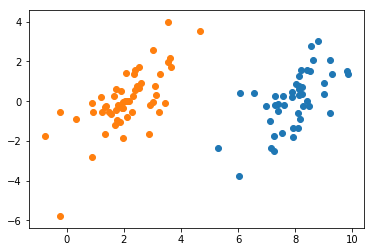

In [3]:
# -*- coding:UTF-8 -*-
import matplotlib.pyplot as plt
import numpy as np

"""
函数说明:读取数据

Parameters:
    fileName - 文件名
Returns:
    dataMat - 数据矩阵
    labelMat - 数据标签
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-09-21
"""
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():                                     #逐行读取，滤除空格等
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])      #添加数据
        labelMat.append(float(lineArr[2]))                          #添加标签
    return dataMat,labelMat

"""
函数说明:数据可视化

Parameters:
    dataMat - 数据矩阵
    labelMat - 数据标签
Returns:
    无
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-09-21
"""
def showDataSet(dataMat, labelMat):
    data_plus = []                                  #正样本
    data_minus = []                                 #负样本
    for i in range(len(dataMat)):
        if labelMat[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)              #转换为numpy矩阵
    data_minus_np = np.array(data_minus)            #转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1])   #正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1]) #负样本散点图
    plt.show()

if __name__ == '__main__':
    dataMat, labelMat = loadDataSet('testSet.txt')
    showDataSet(dataMat, labelMat)

这就是我们使用的二维数据集，显然线性可分。现在我们使用简化版的SMO算法进行求解。

##  6.2 - 简化版SMO算法
按照上述已经推导的步骤编写代码：

第0次迭代 样本:0, alpha优化次数:1
第0次迭代 样本:3, alpha优化次数:2
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:10, alpha优化次数:3
第0次迭代 样本:18, alpha优化次数:4
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
L==H
L==H
alpha_j变化太小
alpha_j变化太小
L==H
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:5, alpha优化次数:1
L==H
L==H
alpha_j变化太小
L==H
第0次迭代 样本:17, alpha优化次数:2
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
L==H
L==H
第0次迭代 样本:54, alpha优化次数:3
alpha_j变化太小
L==H
第0次迭代 样本:69, alpha优化次数:4
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:18, alpha优化次数:1
第0次迭代 样本:22, alpha优化次数:2
第0次迭代 样本:23, alpha优化次数:3
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:35, alpha优化次数:4
alpha_j变化太小
L==H
L==H
第0次迭代 样本:54, alpha优化次数:5
第0次迭代 样本:55, alpha优化次数:6
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:10, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
第0次迭代 样本:5, alpha优化次数:1
alpha_j变化太小
第

alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 2
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 3
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 4
alpha_j变化太小
第4次迭代 样本:29, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 2
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 3
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 4
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 5
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 6
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 7
alpha_j变化太小
第7次迭代 样本:23, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
第7次迭代 样本:55, alpha优化次数

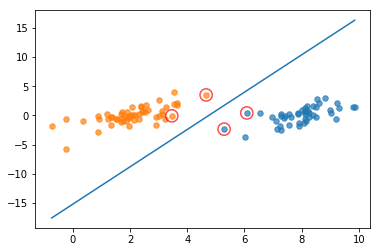

In [4]:
# -*- coding:UTF-8 -*-
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import random
import types

"""
函数说明:读取数据

Parameters:
    fileName - 文件名
Returns:
    dataMat - 数据矩阵
    labelMat - 数据标签
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-09-21
"""
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():                                     #逐行读取，滤除空格等
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])      #添加数据
        labelMat.append(float(lineArr[2]))                          #添加标签
    return dataMat,labelMat


"""
函数说明:随机选择alpha

Parameters:
    i - alpha
    m - alpha参数个数
Returns:
    j -
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-09-21
"""
def selectJrand(i, m):
    j = i                                 #选择一个不等于i的j
    while (j == i):
        j = int(random.uniform(0, m))
    return j

"""
函数说明:修剪alpha

Parameters:
    aj - alpha值
    H - alpha上限
    L - alpha下限
Returns:
    aj - alpah值
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-09-21
"""
def clipAlpha(aj,H,L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

"""
函数说明:简化版SMO算法

Parameters:
    dataMatIn - 数据矩阵
    classLabels - 数据标签
    C - 松弛变量
    toler - 容错率
    maxIter - 最大迭代次数
Returns:
    无
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-09-23
"""
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    #转换为numpy的mat存储
    dataMatrix = np.mat(dataMatIn); labelMat = np.mat(classLabels).transpose()
    #初始化b参数，统计dataMatrix的维度
    b = 0; m,n = np.shape(dataMatrix)
    #初始化alpha参数，设为0
    alphas = np.mat(np.zeros((m,1)))
    #初始化迭代次数
    iter_num = 0
    #最多迭代matIter次
    while (iter_num < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            #步骤1：计算误差Ei
            fXi = float(np.multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            Ei = fXi - float(labelMat[i])
            #优化alpha，更设定一定的容错率。
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                #随机选择另一个与alpha_i成对优化的alpha_j
                j = selectJrand(i,m)
                #步骤1：计算误差Ej
                fXj = float(np.multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = fXj - float(labelMat[j])
                #保存更新前的aplpha值，使用深拷贝
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                #步骤2：计算上下界L和H
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print("L==H"); continue
                #步骤3：计算eta
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: print("eta>=0"); continue
                #步骤4：更新alpha_j
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                #步骤5：修剪alpha_j
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001): print("alpha_j变化太小"); continue
                #步骤6：更新alpha_i
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])
                #步骤7：更新b_1和b_2
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                #步骤8：根据b_1和b_2更新b
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                #统计优化次数
                alphaPairsChanged += 1
                #打印统计信息
                print("第%d次迭代 样本:%d, alpha优化次数:%d" % (iter_num,i,alphaPairsChanged))
        #更新迭代次数
        if (alphaPairsChanged == 0): iter_num += 1
        else: iter_num = 0
        print("迭代次数: %d" % iter_num)
    return b,alphas

"""
函数说明:分类结果可视化

Parameters:
    dataMat - 数据矩阵
    w - 直线法向量
    b - 直线解决
Returns:
    无
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-09-23
"""
def showClassifer(dataMat, w, b):
    #绘制样本点
    data_plus = []                                  #正样本
    data_minus = []                                 #负样本
    for i in range(len(dataMat)):
        if labelMat[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)              #转换为numpy矩阵
    data_minus_np = np.array(data_minus)            #转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1], s=30, alpha=0.7)   #正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1], s=30, alpha=0.7) #负样本散点图
    #绘制直线
    x1 = max(dataMat)[0]
    x2 = min(dataMat)[0]
    a1, a2 = w
    b = float(b)
    a1 = float(a1[0])
    a2 = float(a2[0])
    y1, y2 = (-b- a1*x1)/a2, (-b - a1*x2)/a2
    plt.plot([x1, x2], [y1, y2])
    #找出支持向量点
    for i, alpha in enumerate(alphas):
        if alpha > 0:
            x, y = dataMat[i]
            plt.scatter([x], [y], s=150, c='none', alpha=0.7, linewidth=1.5, edgecolor='red')
    plt.show()


"""
函数说明:计算w

Parameters:
    dataMat - 数据矩阵
    labelMat - 数据标签
    alphas - alphas值
Returns:
    无
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-09-23
"""
def get_w(dataMat, labelMat, alphas):
    alphas, dataMat, labelMat = np.array(alphas), np.array(dataMat), np.array(labelMat)
    w = np.dot((np.tile(labelMat.reshape(1, -1).T, (1, 2)) * dataMat).T, alphas)
    return w.tolist()


if __name__ == '__main__':
    dataMat, labelMat = loadDataSet('testSet.txt')
    b,alphas = smoSimple(dataMat, labelMat, 0.6, 0.001, 40)
    w = get_w(dataMat, labelMat, alphas)
    showClassifer(dataMat, w, b)

# 7 - 非线性SVM

## 7.1 - 核技巧

我们已经了解到，SVM如何处理线性可分的情况，而对于非线性的情况，SVM的处理方式就是选择一个核函数。简而言之：在线性不可分的情况下，SVM通过某种事先选择的非线性映射（核函数）将输入变量映到一个高维特征空间，将其变成在高维空间线性可分，在这个高维空间中构造最优分类超平面。

在线性可分的情况下，可知最终的超平面方程为：

$$f(x)=\sum_{i=1}^n\alpha_iy_ix_i^Tx+b$$
将上述公式用内积来表示：
$$f(x)=\sum_{i=1}^n\alpha_iy_i\left \langle x_i,x \right \rangle+b$$

对于线性不可分，我们使用一个非线性映射，将数据映射到特征空间，在特征空间中使用线性学习器，分类函数变形如下：
$$f(x)=\sum_{i=1}^n\alpha_iy_i\left \langle \Phi (x_i),\Phi (x) \right \rangle+b$$

其中ϕ从输入空间(X)到某个特征空间(F)的映射，这意味着建立非线性学习器分为两步：

* 首先使用一个非线性映射将数据变换到一个特征空间F；

* 然后在特征空间使用线性学习器分类。

如果有一种方法可以在特征空间中直接计算内积 <ϕ(xi),ϕ(x)>，就像在原始输入点的函数中一样，就有可能将两个步骤融合到一起建立一个分线性的学习器，这样直接计算的方法称为核函数方法。

这里直接给出一个定义：核是一个函数k，对所有x,z∈X，满足k(x,z)=<ϕ(xi),ϕ(x)>，这里ϕ(·)是从原始输入空间X到内积空间F的映射。

简而言之：如果不是用核技术，就会先计算线性映ϕ(x1)和ϕ(x2)，然后计算这它们的内积，使用了核技术之后，先把ϕ(x1)和ϕ(x2)的一般表达式<ϕ(x1),ϕ(x2)>=k(<ϕ(x1),ϕ(x2) >)计算出来，这里的<·，·>表示内积，k(·，·)就是对应的核函数，这个表达式往往非常简单，所以计算非常方便。

这种将内积替换成核函数的方式被称为核技巧(kernel trick)。

## 7.2 - 非线性数据处理

已经知道了核技巧是什么，但是为什么要这样做呢？我们先举一个简单的例子，进行说明。假设二维平面x-y上存在若干点，其中点集A服从 {x,y|x^2+y^2=1}，点集B服从{x,y|x^2+y^2=9}，那么这些点在二维平面上的分布是这样的：

![ml_9_6.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/11-%E6%A0%B81.png?raw=true)

蓝色的是点集A，红色的是点集B，他们在xy平面上并不能线性可分，即用一条直线分割（ 虽然肉眼是可以识别的） 。采用映射(x,y)->(x,y,x^2+y^2)后，在三维空间的点的分布为：

![ml_9_7.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/11-%E6%A0%B82.png?raw=true)

可见红色和蓝色的点被映射到了不同的平面，在更高维空间中是线性可分的（用一个平面去分割）。

上述例子中的样本点的分布遵循圆的分布。继续推广到椭圆的一般样本形式：

![ml_9_8.png](https://github.com/LiAnGGGGGG/Machine-Learning-Note/blob/master/%E5%9B%BE%E7%89%87/11-%E6%A0%B83.png?raw=true)

上图的两类数据分布为两个椭圆的形状，这样的数据本身就是不可分的。不难发现，这两个半径不同的椭圆是加上了少量的噪音生成得到的。所以，一个理想的分界应该也是一个椭圆，而不是一个直线。如果用X1和X2来表示这个二维平面的两个坐标的话，我们知道这个分界椭圆可以写为：

$$\alpha_1X_1+\alpha_2X_2^2+\alpha_3X_2+\alpha_4X_2^2+\alpha_5X_1X_2+\alpha_6=0$$

这个方程就是高中学过的椭圆一般方程。注意上面的形式，如果我们构造另外一个五维的空间，其中五个坐标的值分别为：

$$Z_1=X_1,Z_2=X_1^2,Z_3=X_2,Z_4=X_2^2,Z_5=X_1X_2$$

那么，显然我们可以将这个分界的椭圆方程写成如下形式：
$$\sum_{i=1}^5\alpha_iZ_i+\alpha_6=0$$

这个关于新的坐标Z1,Z2,Z3,Z4,Z5的方程，就是一个超平面方程，它的维度是5。也就是说，如果我们做一个映射 ϕ : 二维 → 五维，将 X1,X2按照上面的规则映射为 Z1,Z2,··· ,Z5，那么在新的空间中原来的数据将变成线性可分的，从而使用之前我们推导的线性分类算法就可以进行处理了。

我们举个简单的计算例子，现在假设已知的映射函数为：

$$\Phi ((x_1,x_2))=(\sqrt 2 x_1,x_1^2,\sqrt 2x_2,x_2^2,\sqrt 2x_1x_2,1)$$

这个是一个从2维映射到5维的例子。如果没有使用核函数，根据上一小节的介绍，我们需要先结算映射后的结果，然后再进行内积运算。那么对于两个向量a1=(x1,x2)和a2=(y1,y2)有：

$$\left \langle \Phi((x_1,x_2),\Phi(y_1,y_2)) \right \rangle=2x_1y_1+x_1^2y_1^2+2x_2y_2+x_2^2y_2^2+2x_1x_2y_1y_2+1$$

另外，如果我们不进行映射计算，直接运算下面的公式：
$$(\left \langle x_1,x_2\right\rangle+1)^2=2x_1y_1+x_1^2y_1^2+2x_2y_2+x_2^2y_2^2+2x_1x_2y_1y_2+1$$

你会发现，这两个公式的计算结果是相同的。区别在于什么呢？

* 一个是根据映射函数，映射到高维空间中，然后再根据内积的公式进行计算，计算量大；
* 另一个则直接在原来的低维空间中进行计算，而不需要显式地写出映射后的结果，计算量小。

其实，在这个例子中，核函数是：
$$k(x_1,x_2)=(\left\langle x_1,x_2\right\langle+1)^2$$

我们通过k(x1,x2)的低维运算得到了先映射再内积的高维运算的结果，这就是核函数的神奇之处，它有效减少了我们的计算量。在这个例子中，我们对一个2维空间做映射，选择的新的空间是原始空间的所以一阶和二阶的组合，得到了5维的新空间；如果原始空间是3维的，那么我们会得到19维的新空间，这个数目是呈爆炸性增长的。如果我们使用ϕ(·)做映射计算，难度非常大，而且如果遇到无穷维的情况，就根本无从计算了。所以使用核函数进行计算是非常有必要的。

## 7.3 - 核技巧的实现

通过核技巧的转变，我们的分类函数变为：

$$f(x)=\sum_{i=1}^n\alpha_iy_ik(x_i,x)+b$$

我们的对偶问题变成了：

$$\underset{\alpha}{max}\sum_{i=1}^n\alpha_i-\frac{1}{2}\alpha_i\alpha_jy_iy_jk(x_i,x_j)$$

$$s.t.　\alpha_i\geq 0 ,i=1,2,\dots,n$$

$$\sum_{i=1}^n\alpha_iy_i=0$$

这样，我们就避开了高纬度空间中的计算。当然，我们刚刚的例子是非常简单的，我们可以手动构造出来对应映射的核函数出来，如果对于任意一个映射，要构造出对应的核函数就很困难了。因此，通常，人们会从一些常用的核函数中进行选择，根据问题和数据的不同，选择不同的参数，得到不同的核函数。接下来，要介绍的就是一个非常流行的核函数，那就是径向基核函数。

径向基核函数是SVM中常用的一个核函数。径向基核函数采用向量作为自变量的函数，能够基于向量举例运算输出一个标量。径向基核函数的高斯版本的公式如下：

$$k(x_1,x-2)=exp\left \{ -\frac{||x_1-x_2||^2}{2\sigma^2} \right \}$$

其中，σ是用户自定义的用于确定到达率(reach)或者说函数值跌落到0的速度参数。上述高斯核函数将数据从原始空间映射到无穷维空间。关于无穷维空间，我们不必太担心。

高斯核函数只是一个常用的核函数，使用者并不需要确切地理解数据到底是如何表现的，而且使用高斯核函数还会得到一个理想的结果。如果σ选得很大的话，高次特征上的权重实际上衰减得非常快，所以实际上（数值上近似一下）相当于一个低维的子空间；

反过来，如果σ选得很小，则可以将任意的数据映射为线性可分——当然，这并不一定是好事，因为随之而来的可能是非常严重的过拟合问题。不过，总的来说，通过调控参数σ，高斯核实际上具有相当高的灵活性，也是使用最广泛的核函数之一。

# 8 - 用Python实现非线性SVM

## 8.1 - 可视化数据集

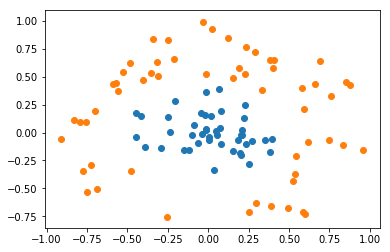

In [3]:
# -*-coding:utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np

def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():                                     #逐行读取，滤除空格等
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])      #添加数据
        labelMat.append(float(lineArr[2]))                          #添加标签
    return dataMat,labelMat

def showDataSet(dataMat, labelMat):
    """
    数据可视化
    Parameters:
        dataMat - 数据矩阵
        labelMat - 数据标签
    Returns:
        无
    """
    data_plus = []                                  #正样本
    data_minus = []                                 #负样本
    for i in range(len(dataMat)):
        if labelMat[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)              #转换为numpy矩阵
    data_minus_np = np.array(data_minus)            #转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1])   #正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1]) #负样本散点图
    plt.show()

if __name__ == '__main__':
    dataArr,labelArr = loadDataSet('testSetRBF.txt')                        #加载训练集
    showDataSet(dataArr, labelArr)

可见，数据明显是线性不可分的。下面我们根据公式，编写核函数，并增加初始化参数kTup用于存储核函数有关的信息，同时我们只要将之前的内积运算变成核函数的运算即可。最后编写testRbf()函数，用于测试。创建svmMLiA.py文件，编写代码如下：



In [4]:
# -*-coding:utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import random

"""
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-10-03
"""

class optStruct:
    """
    数据结构，维护所有需要操作的值
    Parameters：
        dataMatIn - 数据矩阵
        classLabels - 数据标签
        C - 松弛变量
        toler - 容错率
        kTup - 包含核函数信息的元组,第一个参数存放核函数类别，第二个参数存放必要的核函数需要用到的参数
    """
    def __init__(self, dataMatIn, classLabels, C, toler, kTup):
        self.X = dataMatIn                                #数据矩阵
        self.labelMat = classLabels                        #数据标签
        self.C = C                                         #松弛变量
        self.tol = toler                                 #容错率
        self.m = np.shape(dataMatIn)[0]                 #数据矩阵行数
        self.alphas = np.mat(np.zeros((self.m,1)))         #根据矩阵行数初始化alpha参数为0   
        self.b = 0                                         #初始化b参数为0
        self.eCache = np.mat(np.zeros((self.m,2)))         #根据矩阵行数初始化虎误差缓存，第一列为是否有效的标志位，第二列为实际的误差E的值。
        self.K = np.mat(np.zeros((self.m,self.m)))        #初始化核K
        for i in range(self.m):                            #计算所有数据的核K
            self.K[:,i] = kernelTrans(self.X, self.X[i,:], kTup)

def kernelTrans(X, A, kTup):
    """
    通过核函数将数据转换更高维的空间
    Parameters：
        X - 数据矩阵
        A - 单个数据的向量
        kTup - 包含核函数信息的元组
    Returns:
        K - 计算的核K
    """
    m,n = np.shape(X)
    K = np.mat(np.zeros((m,1)))
    if kTup[0] == 'lin': K = X * A.T                       #线性核函数,只进行内积。
    elif kTup[0] == 'rbf':                                 #高斯核函数,根据高斯核函数公式进行计算
        for j in range(m):
            deltaRow = X[j,:] - A
            K[j] = deltaRow*deltaRow.T
        K = np.exp(K/(-1*kTup[1]**2))                     #计算高斯核K
    else: raise NameError('核函数无法识别')
    return K                                             #返回计算的核K

def loadDataSet(fileName):
    """
    读取数据
    Parameters:
        fileName - 文件名
    Returns:
        dataMat - 数据矩阵
        labelMat - 数据标签
    """
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():                                     #逐行读取，滤除空格等
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])      #添加数据
        labelMat.append(float(lineArr[2]))                          #添加标签
    return dataMat,labelMat

def calcEk(oS, k):
    """
    计算误差
    Parameters：
        oS - 数据结构
        k - 标号为k的数据
    Returns:
        Ek - 标号为k的数据误差
    """
    fXk = float(np.multiply(oS.alphas,oS.labelMat).T*oS.K[:,k] + oS.b)
    Ek = fXk - float(oS.labelMat[k])
    return Ek

def selectJrand(i, m):
    """
    函数说明:随机选择alpha_j的索引值

    Parameters:
        i - alpha_i的索引值
        m - alpha参数个数
    Returns:
        j - alpha_j的索引值
    """
    j = i                                 #选择一个不等于i的j
    while (j == i):
        j = int(random.uniform(0, m))
    return j

def selectJ(i, oS, Ei):
    """
    内循环启发方式2
    Parameters：
        i - 标号为i的数据的索引值
        oS - 数据结构
        Ei - 标号为i的数据误差
    Returns:
        j, maxK - 标号为j或maxK的数据的索引值
        Ej - 标号为j的数据误差
    """
    maxK = -1; maxDeltaE = 0; Ej = 0                         #初始化
    oS.eCache[i] = [1,Ei]                                      #根据Ei更新误差缓存
    validEcacheList = np.nonzero(oS.eCache[:,0].A)[0]        #返回误差不为0的数据的索引值
    if (len(validEcacheList)) > 1:                            #有不为0的误差
        for k in validEcacheList:                           #遍历,找到最大的Ek
            if k == i: continue                             #不计算i,浪费时间
            Ek = calcEk(oS, k)                                #计算Ek
            deltaE = abs(Ei - Ek)                            #计算|Ei-Ek|
            if (deltaE > maxDeltaE):                        #找到maxDeltaE
                maxK = k; maxDeltaE = deltaE; Ej = Ek
        return maxK, Ej                                        #返回maxK,Ej
    else:                                                   #没有不为0的误差
        j = selectJrand(i, oS.m)                            #随机选择alpha_j的索引值
        Ej = calcEk(oS, j)                                    #计算Ej
    return j, Ej                                             #j,Ej

def updateEk(oS, k):
    """
    计算Ek,并更新误差缓存
    Parameters：
        oS - 数据结构
        k - 标号为k的数据的索引值
    Returns:
        无
    """
    Ek = calcEk(oS, k)                                        #计算Ek
    oS.eCache[k] = [1,Ek]                                    #更新误差缓存

def clipAlpha(aj,H,L):
    """
    修剪alpha_j
    Parameters:
        aj - alpha_j的值
        H - alpha上限
        L - alpha下限
    Returns:
        aj - 修剪后的alpah_j的值
    """
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

def innerL(i, oS):
    """
    优化的SMO算法
    Parameters：
        i - 标号为i的数据的索引值
        oS - 数据结构
    Returns:
        1 - 有任意一对alpha值发生变化
        0 - 没有任意一对alpha值发生变化或变化太小
    """
    #步骤1：计算误差Ei
    Ei = calcEk(oS, i)
    #优化alpha,设定一定的容错率。
    if ((oS.labelMat[i] * Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i] * Ei > oS.tol) and (oS.alphas[i] > 0)):
        #使用内循环启发方式2选择alpha_j,并计算Ej
        j,Ej = selectJ(i, oS, Ei)
        #保存更新前的aplpha值，使用深拷贝
        alphaIold = oS.alphas[i].copy(); alphaJold = oS.alphas[j].copy();
        #步骤2：计算上下界L和H
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
        if L == H:
            print("L==H")
            return 0
        #步骤3：计算eta
        eta = 2.0 * oS.K[i,j] - oS.K[i,i] - oS.K[j,j]
        if eta >= 0:
            print("eta>=0")
            return 0
        #步骤4：更新alpha_j
        oS.alphas[j] -= oS.labelMat[j] * (Ei - Ej)/eta
        #步骤5：修剪alpha_j
        oS.alphas[j] = clipAlpha(oS.alphas[j],H,L)
        #更新Ej至误差缓存
        updateEk(oS, j)
        if (abs(oS.alphas[j] - alphaJold) < 0.00001):
            print("alpha_j变化太小")
            return 0
        #步骤6：更新alpha_i
        oS.alphas[i] += oS.labelMat[j]*oS.labelMat[i]*(alphaJold - oS.alphas[j])
        #更新Ei至误差缓存
        updateEk(oS, i)
        #步骤7：更新b_1和b_2
        b1 = oS.b - Ei- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,i] - oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[i,j]
        b2 = oS.b - Ej- oS.labelMat[i]*(oS.alphas[i]-alphaIold)*oS.K[i,j]- oS.labelMat[j]*(oS.alphas[j]-alphaJold)*oS.K[j,j]
        #步骤8：根据b_1和b_2更新b
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]): oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]): oS.b = b2
        else: oS.b = (b1 + b2)/2.0
        return 1
    else:
        return 0

def smoP(dataMatIn, classLabels, C, toler, maxIter, kTup = ('lin',0)):
    """
    完整的线性SMO算法
    Parameters：
        dataMatIn - 数据矩阵
        classLabels - 数据标签
        C - 松弛变量
        toler - 容错率
        maxIter - 最大迭代次数
        kTup - 包含核函数信息的元组
    Returns:
        oS.b - SMO算法计算的b
        oS.alphas - SMO算法计算的alphas
    """
    oS = optStruct(np.mat(dataMatIn), np.mat(classLabels).transpose(), C, toler, kTup)                #初始化数据结构
    iter = 0                                                                                         #初始化当前迭代次数
    entireSet = True; alphaPairsChanged = 0
    while (iter < maxIter) and ((alphaPairsChanged > 0) or (entireSet)):                            #遍历整个数据集都alpha也没有更新或者超过最大迭代次数,则退出循环
        alphaPairsChanged = 0
        if entireSet:                                                                                #遍历整个数据集                           
            for i in range(oS.m):       
                alphaPairsChanged += innerL(i,oS)                                                    #使用优化的SMO算法
                print("全样本遍历:第%d次迭代 样本:%d, alpha优化次数:%d" % (iter,i,alphaPairsChanged))
            iter += 1
        else:                                                                                         #遍历非边界值
            nonBoundIs = np.nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]                        #遍历不在边界0和C的alpha
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i,oS)
                print("非边界遍历:第%d次迭代 样本:%d, alpha优化次数:%d" % (iter,i,alphaPairsChanged))
            iter += 1
        if entireSet:                                                                                #遍历一次后改为非边界遍历
            entireSet = False
        elif (alphaPairsChanged == 0):                                                                #如果alpha没有更新,计算全样本遍历
            entireSet = True 
        print("迭代次数: %d" % iter)
    return oS.b,oS.alphas                                                                             #返回SMO算法计算的b和alphas

def testRbf(k1 = 1.3):
    """
    测试函数
    Parameters:
        k1 - 使用高斯核函数的时候表示到达率
    Returns:
        无
    """
    dataArr,labelArr = loadDataSet('testSetRBF.txt')                        #加载训练集
    b,alphas = smoP(dataArr, labelArr, 200, 0.0001, 100, ('rbf', k1))        #根据训练集计算b和alphas
    datMat = np.mat(dataArr); labelMat = np.mat(labelArr).transpose()
    svInd = np.nonzero(alphas.A > 0)[0]                                        #获得支持向量
    sVs = datMat[svInd]                                                     
    labelSV = labelMat[svInd];
    print("支持向量个数:%d" % np.shape(sVs)[0])
    m,n = np.shape(datMat)
    errorCount = 0
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],('rbf', k1))                #计算各个点的核
        predict = kernelEval.T * np.multiply(labelSV,alphas[svInd]) + b     #根据支持向量的点，计算超平面，返回预测结果
        if np.sign(predict) != np.sign(labelArr[i]): errorCount += 1        #返回数组中各元素的正负符号，用1和-1表示，并统计错误个数
    print("训练集错误率: %.2f%%" % ((float(errorCount)/m)*100))             #打印错误率
    dataArr,labelArr = loadDataSet('testSetRBF2.txt')                         #加载测试集
    errorCount = 0
    datMat = np.mat(dataArr); labelMat = np.mat(labelArr).transpose()         
    m,n = np.shape(datMat)
    for i in range(m):
        kernelEval = kernelTrans(sVs,datMat[i,:],('rbf', k1))                 #计算各个点的核           
        predict=kernelEval.T * np.multiply(labelSV,alphas[svInd]) + b         #根据支持向量的点，计算超平面，返回预测结果
        if np.sign(predict) != np.sign(labelArr[i]): errorCount += 1        #返回数组中各元素的正负符号，用1和-1表示，并统计错误个数
    print("测试集错误率: %.2f%%" % ((float(errorCount)/m)*100))             #打印错误率

def showDataSet(dataMat, labelMat):
    """
    数据可视化
    Parameters:
        dataMat - 数据矩阵
        labelMat - 数据标签
    Returns:
        无
    """
    data_plus = []                                  #正样本
    data_minus = []                                 #负样本
    for i in range(len(dataMat)):
        if labelMat[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)              #转换为numpy矩阵
    data_minus_np = np.array(data_minus)            #转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1])   #正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1]) #负样本散点图
    plt.show()

if __name__ == '__main__':
    testRbf()

全样本遍历:第0次迭代 样本:0, alpha优化次数:1
全样本遍历:第0次迭代 样本:1, alpha优化次数:1
全样本遍历:第0次迭代 样本:2, alpha优化次数:2
全样本遍历:第0次迭代 样本:3, alpha优化次数:3
全样本遍历:第0次迭代 样本:4, alpha优化次数:3
全样本遍历:第0次迭代 样本:5, alpha优化次数:4
全样本遍历:第0次迭代 样本:6, alpha优化次数:5
全样本遍历:第0次迭代 样本:7, alpha优化次数:5
全样本遍历:第0次迭代 样本:8, alpha优化次数:6
全样本遍历:第0次迭代 样本:9, alpha优化次数:6
全样本遍历:第0次迭代 样本:10, alpha优化次数:7
全样本遍历:第0次迭代 样本:11, alpha优化次数:8
全样本遍历:第0次迭代 样本:12, alpha优化次数:8
全样本遍历:第0次迭代 样本:13, alpha优化次数:9
全样本遍历:第0次迭代 样本:14, alpha优化次数:10
全样本遍历:第0次迭代 样本:15, alpha优化次数:11
全样本遍历:第0次迭代 样本:16, alpha优化次数:12
全样本遍历:第0次迭代 样本:17, alpha优化次数:12
全样本遍历:第0次迭代 样本:18, alpha优化次数:13
全样本遍历:第0次迭代 样本:19, alpha优化次数:14
全样本遍历:第0次迭代 样本:20, alpha优化次数:14
全样本遍历:第0次迭代 样本:21, alpha优化次数:15
全样本遍历:第0次迭代 样本:22, alpha优化次数:15
全样本遍历:第0次迭代 样本:23, alpha优化次数:15
全样本遍历:第0次迭代 样本:24, alpha优化次数:16
alpha_j变化太小
全样本遍历:第0次迭代 样本:25, alpha优化次数:16
全样本遍历:第0次迭代 样本:26, alpha优化次数:16
alpha_j变化太小
全样本遍历:第0次迭代 样本:27, alpha优化次数:16
全样本遍历:第0次迭代 样本:28, alpha优化次数:16
全样本遍历:第0次迭代 样本:29, alpha优化次数:16
alpha_j变化太小
全样本遍历:第0次迭代 样本:30, alpha优化次数